In [1]:
from geopandas.tools import sjoin_nearest
from scipy.spatial import cKDTree
from IPython.display import Image
import geopandas as gpd
from pyproj import CRS
import pandas as pd

from raster_functions import *
EPSG_Namibia_Code = 32733

/tmp/ipykernel_154569/899723803.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  from geopandas.tools import sjoin_nearest


In [2]:
%%time

directory = '/DATA/magalhaes/icesat2_atl03/atl03_hdf_window/'

file_pattern = ['ATL03_TOC', 'ATL03_Grass']
start_date = '2018-10-01'
nmonths = 41

dfs_list = merge_df_nmonths(directory, start_date, nmonths, file_pattern)

CPU times: user 34.5 s, sys: 5.74 s, total: 40.2 s
Wall time: 2min 29s


In [3]:
%%time

gdf_TOC, gdf_Grass = convert_to_geodataframe(dfs_list)

del dfs_list

CPU times: user 2min 47s, sys: 1.73 s, total: 2min 49s
Wall time: 2min 49s


In [4]:
gdf_TOC.shape

(18189581, 18)

**Clip areas drained by perennial rivers:**

In [5]:
%%time

area_paths = ['../catchment_areas/AREAS_FINAL/ephemeral.geojson']

clipped_gdfs = []
for path in area_paths:
    clip_gdf = gpd.read_file(path)
    clip_gdf = clip_gdf.to_crs(epsg=EPSG_Namibia_Code)
    gdf_TOC.loc[gdf_TOC.intersects(clip_gdf.unary_union), 'clipped'] = True
    clipped_gdf = gdf_TOC[gdf_TOC['clipped'] == True].copy()
    clipped_gdfs.append(clipped_gdf)
    gdf_TOC.drop('clipped', axis=1, inplace=True)

ephemeral_TOC = clipped_gdfs[0]

CPU times: user 11min 44s, sys: 855 ms, total: 11min 44s
Wall time: 11min 45s


In [6]:
clip_gdf.crs

<Derived Projected CRS: EPSG:32733>
Name: WGS 84 / UTM zone 33S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, southern hemisphere between 80°S and equator, onshore and offshore. Angola. Congo. Democratic Republic of the Congo (Zaire). Gabon. Namibia. South Africa.
- bounds: (12.0, -80.0, 18.0, 0.0)
Coordinate Operation:
- name: UTM zone 33S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
ephemeral_TOC.head()

,Latitude,Longitude,Along-track_Distance,Land,Easting,Northing,crosstrack,alongtrack,Ground_interp_Height,TOC_Height,z,x,NN,Photons_Numb,Date,easting_sq,northing_sq,geometry,clipped
664104,-19.449941,14.823964,19.617884,2.0,481522.534341,7.849377e+06,2777.324883,2.122541e+06,1310.705608,3.108967,0.005782,0.816899,12.0,1.0,2018-10-18,481,7849,POINT (481522.534 7849376.919),True
669520,-19.493114,14.819451,17.626221,4.0,481053.921286,7.844599e+06,2766.312854,2.127341e+06,1313.825463,3.371681,0.019845,0.831298,6.0,1.0,2018-10-18,481,7844,POINT (481053.921 7844599.102),True
669609,-19.494181,14.819341,16.141409,4.0,481042.484151,7.844481e+06,2765.902049,2.127460e+06,1315.906661,3.496049,0.026502,0.831653,7.0,1.0,2018-10-18,481,7844,POINT (481042.484 7844481.071),True
670348,-19.501279,14.818597,5.014174,4.0,480965.189282,7.843696e+06,2764.338894,2.128249e+06,1316.355991,3.349087,0.018635,0.834021,6.0,1.0,2018-10-18,480,7843,POINT (480965.189 7843695.534),True
670960,-19.507423,14.817951,7.879598,4.0,480898.197509,7.843016e+06,2763.071061,2.128932e+06,1318.479064,3.520326,0.027801,0.836070,9.0,2.0,2018-10-18,480,7843,POINT (480898.198 7843015.577),True


In [8]:
ephemeral_TOC.shape

(1608306, 19)

In [9]:
del gdf_TOC

In [10]:
%%time

area_paths = ['../catchment_areas/AREAS_FINAL/ephemeral.geojson']

clipped_gdfs = []
for path in area_paths:
    clip_gdf = gpd.read_file(path)
    clip_gdf = clip_gdf.to_crs(epsg=EPSG_Namibia_Code)
    gdf_Grass.loc[gdf_Grass.intersects(clip_gdf.unary_union), 'clipped'] = True
    clipped_gdf = gdf_Grass[gdf_Grass['clipped'] == True].copy()
    clipped_gdfs.append(clipped_gdf)
    gdf_Grass.drop('clipped', axis=1, inplace=True)

ephemeral_Grass = clipped_gdfs[0]

CPU times: user 13min 17s, sys: 361 ms, total: 13min 18s
Wall time: 13min 18s


In [11]:
ephemeral_Grass.head()

,Latitude,Longitude,Along-track_Distance,Land,Easting,Northing,crosstrack,alongtrack,Ground_interp_Height,Grass_Height,z,x,NN,Date,easting_sq,northing_sq,geometry,clipped
664111,-19.449986,14.823959,4.589834,4.0,481522.065458,7.849372e+06,2777.295251,2.122545e+06,1310.700435,1.430547,0.372233,0.816628,6.0,2018-10-18,481,7849,POINT (481522.065 7849371.952),True
664157,-19.450351,14.823921,5.175271,4.0,481518.142865,7.849332e+06,2777.160606,2.122586e+06,1310.689956,0.662583,0.065014,0.816750,9.0,2018-10-18,481,7849,POINT (481518.143 7849331.533),True
664390,-19.452690,14.823675,5.172454,4.0,481492.589201,7.849073e+06,2776.724809,2.122846e+06,1310.985233,0.639767,0.055886,0.817530,7.0,2018-10-18,481,7849,POINT (481492.589 7849072.646),True
664503,-19.453900,14.823550,19.606592,4.0,481479.565287,7.848939e+06,2776.311125,2.122981e+06,1310.558216,0.657604,0.063022,0.817933,9.0,2018-10-18,481,7848,POINT (481479.565 7848938.781),True
669521,-19.493121,14.819451,18.334799,4.0,481053.866381,7.844598e+06,2766.296946,2.127342e+06,1313.826908,1.704464,0.481811,0.831013,6.0,2018-10-18,481,7844,POINT (481053.866 7844598.396),True


In [12]:
ephemeral_Grass.shape, ephemeral_TOC.shape

((2070209, 18), (1608306, 19))

In [13]:
del gdf_Grass, clip_gdf, clipped_gdfs

In [14]:
file_path = '../catchment_areas/areas/ephemeral_TOC.gpkg'
if os.path.exists(file_path):
    print('Files already exist')
else:
    ephemeral_TOC.to_file('../catchment_areas/areas/ephemeral_TOC.gpkg', driver='GPKG', layer='points')
    ephemeral_Grass.to_file('../catchment_areas/areas/ephemeral_Grass.gpkg', driver='GPKG', layer='points')

In [2]:
import dask_geopandas as dask_gpd

toc_file = '../catchment_areas/areas/ephemeral_TOC.gpkg'
ephemeral_TOC = dask_gpd.read_file(toc_file, layer='points', chunksize=100000)

grass_file = '../catchment_areas/areas/ephemeral_Grass.gpkg'
ephemeral_Grass = dask_gpd.read_file(grass_file, layer='points', chunksize=100000)

In [3]:
# convert the Dask GeoDataFrame to a Pandas DataFrame
ephemeral_TOC = ephemeral_TOC.compute()
ephemeral_Grass = ephemeral_Grass.compute()

In [4]:
# Reset index to use Dates
ephemeral_TOC = ephemeral_TOC.set_index('Date')
ephemeral_Grass = ephemeral_Grass.set_index('Date')

In [5]:
# Calculate median values for each month
ephemeral_TOC_median = ephemeral_TOC.groupby(ephemeral_TOC.index.strftime('%Y-%m'))['TOC_Height'].median().reset_index()
ephemeral_Grass_median = ephemeral_Grass.groupby(ephemeral_Grass.index.strftime('%Y-%m'))['Grass_Height'].median().reset_index()
ephemeral_Grass_median = ephemeral_Grass_median.set_index('Date')
ephemeral_TOC_median = ephemeral_TOC_median.set_index('Date')

#### Boxplot of areas withing ephemeral rivers catchment areas

In [6]:
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import seaborn as sns
import ee

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# ee.Authenticate()

In [7]:
ee.Initialize()
print(ee.__version__)

0.1.337


In [8]:
# define region of interest
minx, maxx = 14.00, 17.00
miny, maxy = -20.00, -18.50
aoi = Polygon([[minx, maxy], [maxx, maxy], [maxx, miny], [minx, miny]])
ROI = gee_geometry_from_shapely(aoi)
# define period of time series analysis
start_date = '2018-10-01'
end_date = '2022-03-30'

/DATA/magalhaes/ICESat-2_SVDA/JupyterNotebooks/catchment_areas/raster_functions.py:115: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  ty = geom.type


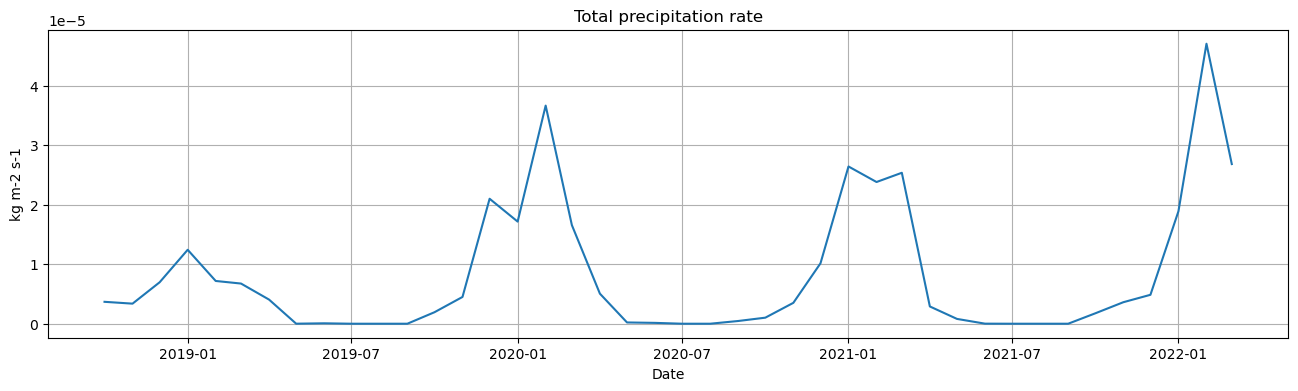

In [9]:
def createTS(image):
    date = image.get('system:time_start')
    value = image.reduceRegion(reducer=ee.Reducer.mean(), geometry=ROI).get(var)
    std = image.reduceRegion(reducer=ee.Reducer.stdDev(), geometry=ROI).get(var)
    ft = ee.Feature(None, {'date': ee.Date(date).format('Y/M/d'), var: value, 'STD': std})
    return ft

def TS_to_pandas(TS):
    dump = TS.getInfo()
    fts = dump['features']
    out_vals = np.empty((len(fts)))
    out_dates = []
    out_std = np.empty((len(fts)))
    
    for i, f in enumerate(fts):
        props = f['properties']
        date = props['date']
        val = props[var]
        std = props['STD']
        out_vals[i] = val
        out_std[i] = std
        out_dates.append(pd.Timestamp(date))
    
    ser = pd.Series(out_vals, index=out_dates)
    return ser, out_std

# Source of precipitation and soil moisture data
# https://developers.google.com/earth-engine/datasets/catalog/NASA_FLDAS_NOAH01_C_GL_M_V001#description

Precip = ee.ImageCollection('NASA/FLDAS/NOAH01/C/GL/M/V001').filter(ee.Filter.date(start_date, end_date)).select('Rainf_f_tavg').filterBounds(ROI)     
var = 'Rainf_f_tavg'
TS = Precip.map(createTS)
Precip_ts, Precip_std = TS_to_pandas(TS)
precipitation = Precip_ts.groupby(Precip_ts.index.date).median()

precipitation.plot(figsize=(16,4))
plt.title('Total precipitation rate')
plt.xlabel('Date')
plt.ylabel('kg m-2 s-1')
plt.grid()

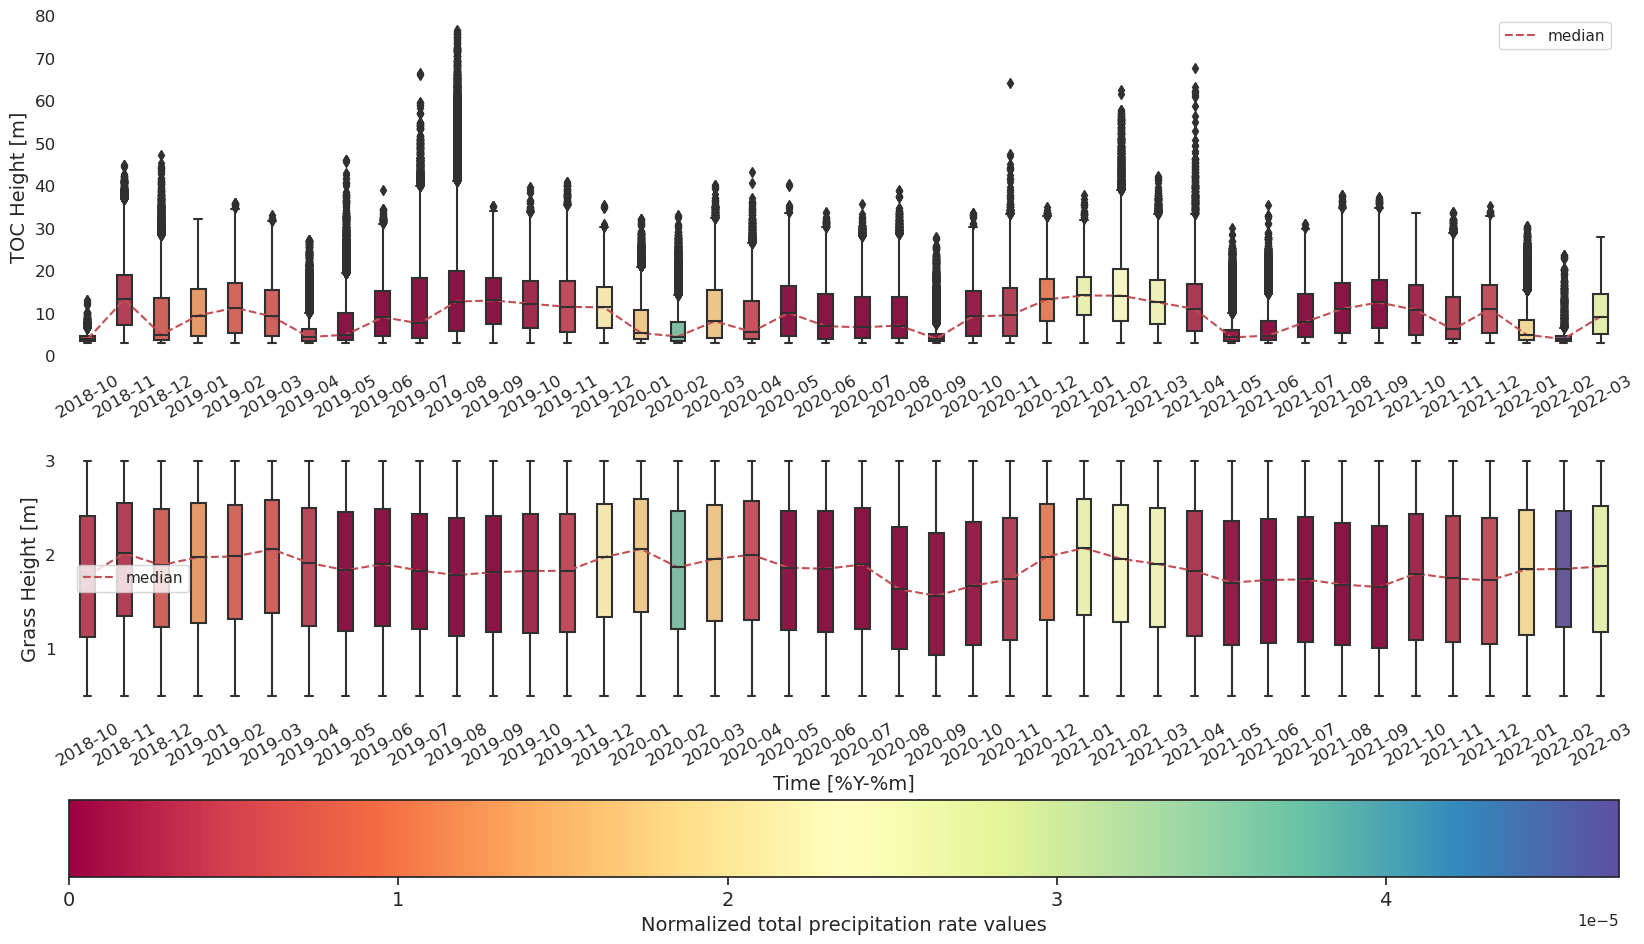

In [10]:
palette = 'Spectral'
sns.set(style='white')

fig, axs = plt.subplots(2,1, figsize=(20, 12), gridspec_kw={'height_ratios': [8, 6]})
plt.subplots_adjust(hspace=0.3)

for ax in axs:
    for spine in ["top", "right", "bottom", "left"]:
        ax.spines[spine].set_visible(False)

norm = plt.Normalize(precipitation.min(), precipitation.max())
colors = plt.cm.Spectral(norm(precipitation))

sns.lineplot(data=ephemeral_TOC_median, x='Date', y='TOC_Height', ax=axs[0], linestyle='--',color='r', label='median')
sns.boxplot(x = ephemeral_TOC.index.strftime('%Y-%m'),
            y = ephemeral_TOC['TOC_Height'],
            palette = colors,
            ax=axs[0], width=0.4)

axs[0].set_xlabel('', fontsize=14)
axs[0].set_ylabel('TOC Height [m]', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30)

sns.lineplot(data=ephemeral_Grass_median, x='Date', y='Grass_Height', ax=axs[1], linestyle='--',color='r', label='median')
sns.boxplot(x = ephemeral_Grass.index.strftime('%Y-%m'),
            y = ephemeral_Grass['Grass_Height'],
            palette = colors,
            ax=axs[1], width=0.4)

axs[1].set_ylabel('Grass Height [m]', fontsize=14)
axs[1].set_xlabel('Time [%Y-%m]', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30)
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))

sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=precipitation.min(), vmax=precipitation.max()))
sm.set_array([])

cbar = plt.colorbar(sm, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.1)
cbar.ax.set_xlabel('Normalized total precipitation rate values', fontsize=14)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)

**Local plots**

In [11]:
def process_dataframes(dataframes, start_value, end_value, start_value_, end_value_):
    subset_dfs = []
    for df in dataframes:
        # select the rows of the DataFrame where the values in 'col' are within the current pair of values
        df_subset = df[(df['easting_sq'] >= start_value) & (df['easting_sq'] < end_value)]
        df_subset = df_subset[(df_subset['northing_sq'] >= start_value_) & (df_subset['northing_sq'] < end_value_)]
        df_subset = df_subset.loc[:, ~df_subset.columns.duplicated(keep='first')]
        subset_dfs.append(df_subset)

    return subset_dfs

In [12]:
# Reset index to use Dates
ephemeral_TOC = ephemeral_TOC.reset_index()
ephemeral_Grass = ephemeral_Grass.reset_index()

In [ ]:
window_size = 1

# Find the minimum and maximum values of easting_sq and northing_sq
min_easting_sq = ephemeral_TOC['easting_sq'].min()
max_easting_sq = ephemeral_TOC['easting_sq'].max()
min_northing_sq = ephemeral_TOC['northing_sq'].min()
max_northing_sq = ephemeral_TOC['northing_sq'].max()

east = list(range(int(min_easting_sq), int(max_easting_sq+1), window_size))
north = list(range(min_northing_sq, max_northing_sq+1, window_size))

for e in range(len(east)-1):
    for n in range(len(north)-1):

        # extract the current pair of values from the list
        start_value = east[e]
        end_value = east[e+1]
        start_value_ = north[n]
        end_value_ = north[n+1]

        dataframes = [ephemeral_Grass, ephemeral_TOC]
        df_Grass, df_TOC = process_dataframes(dataframes,
                                              start_value,
                                              end_value, 
                                              start_value_, 
                                              end_value_)
        

        df_TOC_index = df_TOC.set_index('Date')
        df_Grass_index = df_Grass.set_index('Date')

        df_TOC_median = df_TOC_index.groupby(df_TOC_index.index.strftime('%Y-%m-%d'))['TOC_Height'].median().reset_index()
        df_Grass_median = df_Grass_index.groupby(df_Grass_index.index.strftime('%Y-%m-%d'))['Grass_Height'].median().reset_index()

        df_Grass_median = df_Grass_median.set_index('Date')
        df_TOC_median = df_TOC_median.set_index('Date')

        if len(df_TOC_index.index.unique()) >= 5:
            sns.set(style='dark')
            palette = 'Spectral'

            fig, axs = plt.subplots(2,1, figsize=(20, 7), gridspec_kw={'height_ratios': [6, 4]}, sharex=True)
            for ax in axs:
                for spine in ["top", "right", "bottom", "left"]:
                    ax.spines[spine].set_visible(False)

            norm = plt.Normalize(precipitation.min(), precipitation.max())
            colors = plt.cm.Spectral(norm(precipitation))
            sns.lineplot(data=df_TOC_median, x='Date', y='TOC_Height', ax=axs[0], linestyle='--',color='r', label='median')
            sns.boxplot(x = df_TOC_index.index.strftime('%Y-%m-%d'),
                        y = df_TOC_index['TOC_Height'],
                        palette = colors,
                        ax=axs[0], width=0.05)

            axs[0].set_xlabel('', fontsize=14)
            axs[0].set_ylabel('TOC Height [m]', fontsize=14)
            axs[0].tick_params(axis='both', which='major', labelsize=12)
            axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30)
            axs[0].legend(loc='upper right')

            sns.lineplot(data=df_Grass_median, x='Date', y='Grass_Height', ax=axs[1], linestyle='--',color='r')
            sns.boxplot(x = df_Grass_index.index.strftime('%Y-%m-%d'),
                        y = df_Grass_index['Grass_Height'],
                        ax=axs[1], width=0.05, palette = colors)

            axs[1].set_ylabel('Grass Height [m]', fontsize=14)
            axs[1].set_xlabel('Time [%Y-%m-%d]', fontsize=14)
            axs[1].tick_params(axis='both', which='major', labelsize=12)
            axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30)
            axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))

            # create a new axis for the colorbar
            cbar_ax = fig.add_axes([1.01, 0.25, 0.01, 0.7]) # [left, bottom, width, height]

            # create the colorbar
            sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=precipitation.min(), vmax=precipitation.max()))
            sm.set_array([])
            cbar = plt.colorbar(sm, cax=cbar_ax)

            # adjust the colorbar's tick labels and title
            cbar.ax.tick_params(labelsize=12)
            cbar.ax.set_title('Precipitation', fontsize=14)

            fig.subplots_adjust(hspace=0.1) # increase the vertical spacing between the subplots
            fig.suptitle(f'Easting: {start_value}000-{end_value}000, Northing: {start_value_}000-{end_value_}000', fontsize=14)
#             fig.tight_layout()
            plt.show()

In [28]:
stats_TOC = ephemeral_TOC[['TOC_Height']].describe().round(2)
stats_Grass = ephemeral_Grass[['Grass_Height']].describe().round(2)

In [30]:
# Combine statistics into a single table
table = pd.concat([stats_TOC, stats_Grass], axis=1)
table.columns = ['TOC Height', 'Grass Height']

# Convert table to LaTeX format
latex_table = table.to_latex()

# Print LaTeX code
print(latex_table)

\begin{tabular}{lrr}
\toprule
{} &  TOC\_Height &  Grass\_Height \\
\midrule
count &  1608306.00 &    2070209.00 \\
mean  &       10.98 &          1.80 \\
std   &        7.32 &          0.74 \\
min   &        3.00 &          0.50 \\
25\%   &        4.48 &          1.16 \\
50\%   &        9.25 &          1.83 \\
75\%   &       15.94 &          2.45 \\
max   &       76.59 &          3.00 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_90046/2410183632.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  table.rows = ['TOC Height', 'Grass Height']
/tmp/ipykernel_90046/2410183632.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table.to_latex()


In [31]:
import pandas as pd

# Create the original table
df = pd.DataFrame({
    '': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'TOC Height': [1608306.00, 10.98, 7.32, 3.00, 4.48, 9.25, 15.94, 76.59],
    'Grass Height': [2070209.00, 1.80, 0.74, 0.50, 1.16, 1.83, 2.45, 3.00]
})
df = df.set_index('')

# Transpose the table
df_transposed = df.transpose()

# Convert the transposed table to LaTeX format
latex_table = df_transposed.to_latex()

# Print LaTeX code
print(latex_table)


\begin{tabular}{lrrrrrrrr}
\toprule
{} &      count &   mean &   std &  min &   25\% &   50\% &    75\% &    max \\
\midrule
TOC Height   &  1608306.0 &  10.98 &  7.32 &  3.0 &  4.48 &  9.25 &  15.94 &  76.59 \\
Grass Height &  2070209.0 &   1.80 &  0.74 &  0.5 &  1.16 &  1.83 &   2.45 &   3.00 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_90046/2873193236.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_transposed.to_latex()


---